# 0. Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal

# 1. Blurring

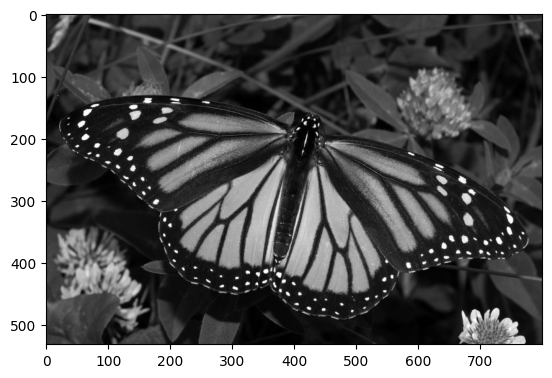

In [3]:
im = plt.imread('monarch_in_may.jpg')
imGray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
plt.imshow(imGray,cmap='gray')

In [4]:
smoothingMask = np.ones((15,15))/225
imBlurred = signal.convolve2d(imGray, smoothingMask
                              , boundary='symm', mode='same')

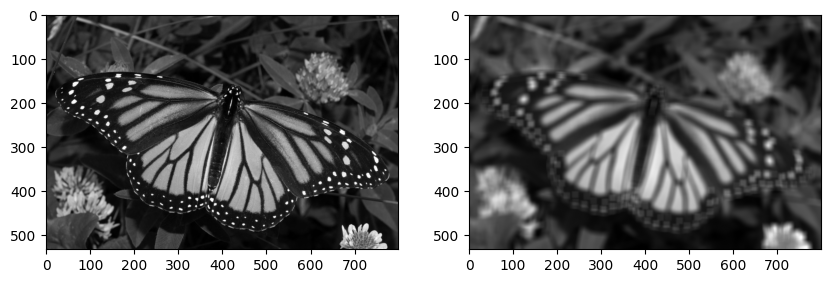

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imGray, cmap='gray')
ax2.imshow(imBlurred, cmap='gray')

# 2. Edge Detection

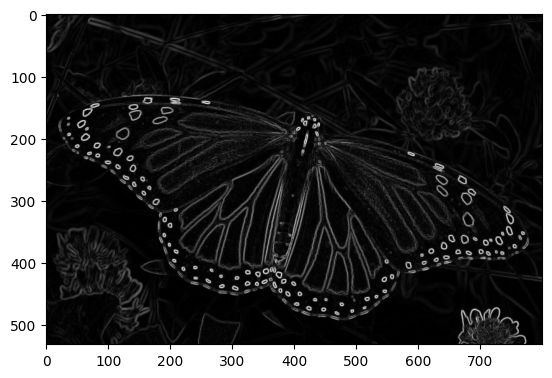

In [9]:
xMask = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
yMask = xMask.T.copy()

fx = signal.convolve2d(imGray,xMask, boundary='symm', mode='same')
fy = signal.convolve2d(imGray,yMask, boundary='symm', mode='same')

Gm = (fx**2 + fy**2)**0.5

plt.imshow(Gm,cmap='gray')

In [7]:
threshold = Gm.max() - (4*Gm.std())
threshold

np.float64(410.1076780958087)

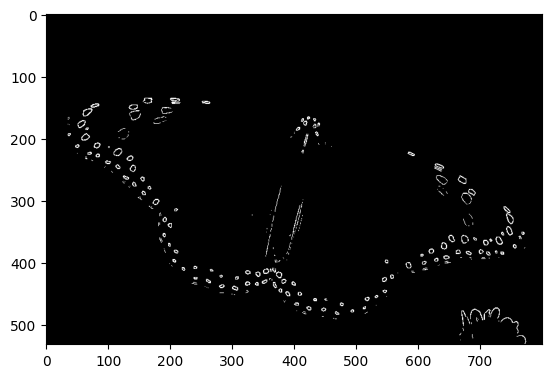

In [8]:
E = Gm > threshold
plt.imshow(E, cmap='gray')

# 3. Sharpenning

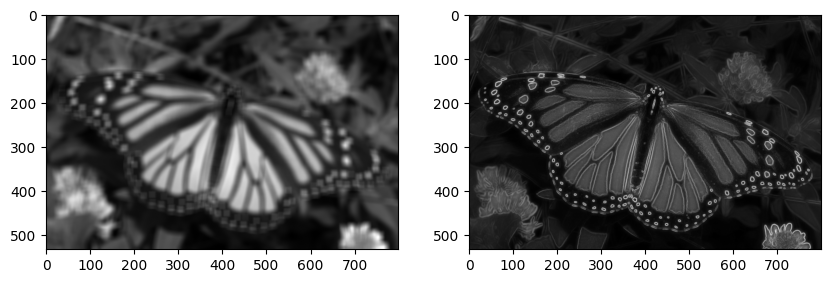

In [15]:
im = plt.imread('monarch_in_may.jpg')
imGray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

smoothingMask = np.ones((15,15))/225
imBlurred = signal.convolve2d(imGray, smoothingMask
                              , boundary='symm', mode='same')

xMask = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
yMask = xMask.T.copy()

fx = signal.convolve2d(imGray,xMask, boundary='symm', mode='same')
fy = signal.convolve2d(imGray,yMask, boundary='symm', mode='same')

Gm = (fx**2 + fy**2)**0.5

imSharped = imBlurred + 0.6*Gm

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imBlurred, cmap='gray')
ax2.imshow(imSharped, cmap='gray')